In [1]:
import torch
import torch.nn as nn
import matplotlib.pyplot as plt
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
# import and process data
import ssl
ssl._create_default_https_context = ssl._create_unverified_context
import seaborn as sns
iris = sns.load_dataset('iris')

In [4]:
# organise the data

# convert from pandas df to tensor
data = torch.tensor(iris[iris.columns[0:4]].values).float()

# transform species to numbers
labels = torch.zeros(len(data), dtype=torch.long)
# labels[iris.species == 'setosa'] = 0 not required as already zeroes are there
labels[iris.species == 'versicolor'] = 1
labels[iris.species == 'virginica'] = 2

In [17]:
# Create the model
def createModel(nHidden):
    ANNiris = nn.Sequential(
        nn.Linear(4,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,nHidden),
        nn.ReLU(),
        nn.Linear(nHidden,3)
    )

    lossFunction = nn.CrossEntropyLoss() # SoftMax already included in the loss function

    optimizer = torch.optim.SGD(ANNiris.parameters(), lr=0.01)

    return ANNiris, lossFunction, optimizer

In [18]:
# train the model

def trainModel(ANNiris, lossFunction, optimizer, epochs):

    for epoch in range(epochs):
        yHat = ANNiris(data)
        loss = lossFunction(yHat, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    predictions = ANNiris(data)
    predictedLabels = torch.argmax(predictions, axis=1)
    totalAcc = torch.mean((predictedLabels==labels).float())*100
    return totalAcc

In [21]:
def plot(finalAcc):
    fig, ax = plt.subplots(1,figsize=(12,6))
    ax.plot(finalAcc, 'ko-', markerfacecolor='w', markersize=9)
    ax.plot()
    ax.set_xlabel('Accuracy')
    ax.set_xlabel('Number of hidden units')
    ax.set_title('Accuracies')
    plt.show()

In [22]:
finalAcc = []
epochs = 150
for n in range(129):
    ANNiris, lossFunction, optimizer = createModel(n)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))

/Users/navsingh15/miniconda3/envs/zoro/lib/python3.10/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


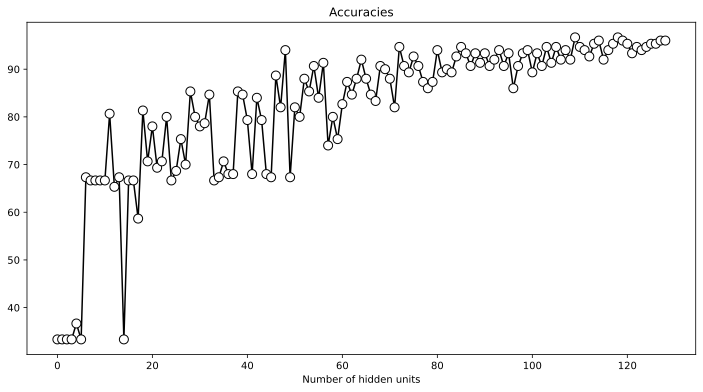

In [24]:
plot(finalAcc) # with 150 epochs

/Users/navsingh15/miniconda3/envs/zoro/lib/python3.10/site-packages/torch/nn/init.py:405: UserWarning: Initializing zero-element tensors is a no-op
  warnings.warn("Initializing zero-element tensors is a no-op")


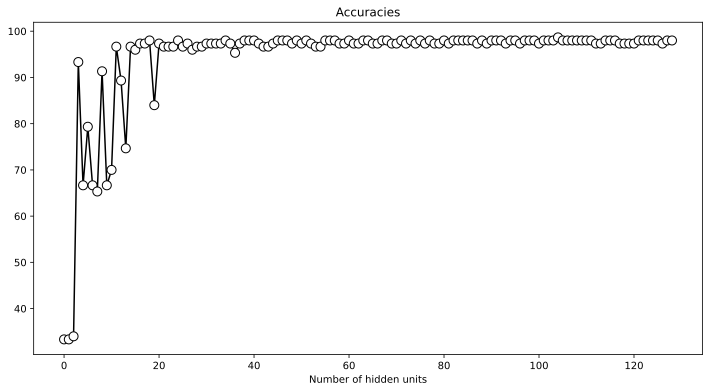

In [25]:
finalAcc = []
epochs = 500
for n in range(129):
    ANNiris, lossFunction, optimizer = createModel(n)
    finalAcc.append(trainModel(ANNiris, lossFunction, optimizer, epochs))
plot(finalAcc)

# accuracies of models with less number of hidden units increased on increasing the number of training epochs. 